<a href="https://colab.research.google.com/github/sedaoturak/Quantum_Espresso_Colab/blob/main/Quantum_Espresso_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Quantum ESPRESSO and ASE

NOTE: Quantum ESPRESSO installation takes ~6 minutes.  ASE installation takes ~2 minute.

In [4]:
# clone Quantun ESPRESSO git file
!git clone https://github.com/QEF/q-e.git

# install dependencies
!apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc

# run configuration and installation
%cd q-e
!DFLAGS='-D__FFTW3 ' FFT_LIBS='-lfftw3' ./configure
!make pw

Cloning into 'q-e'...
remote: Enumerating objects: 199340, done.
remote: Counting objects: 100% (21350/21350), done.
remote: Compressing objects: 100% (6220/6220), done.
remote: Total 199340 (delta 15403), reused 20877 (delta 15108), pack-reused 177990 (from 1)
Receiving objects: 100% (199340/199340), 785.33 MiB | 24.36 MiB/s, done.
Resolving deltas: 100% (159732/159732), done.
Updating files: 100% (7008/7008), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libfftw3-dev is already the newest version (3.3.8-2ubuntu8).
libfftw3-doc is already the newest version (3.3.8-2ubuntu8).
libfftw3-3 is already the newest version (3.3.8-2ubuntu8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/content/q-e/q-e
directory KCW/PP : ok
all dependencies updated successfully
checking build system type... x86_64-pc-linux-gnu
checking ARCH... x86_64
checking setting AR... ... ar
checking setting ARFLAGS... ... ruv
checking for gfortra

In [3]:
# Install ASE for file management and visualization
!apt install ase

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-font-awesome fonts-glyphicons-halflings fonts-lyx libimagequant0
  libjs-bootstrap liblbfgsb0 libraqm0 libxsimd-dev mailcap mime-support python-matplotlib-data
  python3-appdirs python3-ase python3-attr python3-beniget python3-brotli python3-bs4
  python3-chardet python3-cycler python3-dateutil python3-decorator python3-fonttools python3-fs
  python3-gast python3-html5lib python3-kiwisolver python3-lxml python3-lz4 python3-matplotlib
  python3-mpmath python3-numpy python3-olefile python3-packaging python3-pil python3-pil.imagetk
  python3-ply python3-pythran python3-scipy python3-soupsieve python3-spglib python3-sympy
  python3-tz python3-ufolib2 python3-unicodedata2 python3-webencodings unicode-data
Suggested packages:
  python-ase-doc libxsimd-doc python3-netcdf4 python3-pycodcif python-attr-doc python-cycler-d

# Prepare the input file

IMPORTANT: Create a folder named 'silicon' in the main Google Colab folder. Upload the pseudopotential file in this folder.

In [5]:
%cd /content/silicon/

qe_input = """
&control
  prefix='silicon',
  ! this is a comment: you can comment out variables
  ! set pseudo_dir and outdir to suitable directories
  pseudo_dir = '/content/silicon/',
  outdir='/content/silicon/'
/
&system
  ibrav = 2, celldm(1) = 10.7, nat = 2, ntyp = 1,
  ecutwfc = 30.0,
/
&electrons
/
ATOMIC_SPECIES
 Si  28.086  Si.pz-vbc.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
   4 4 4 1 1 1
"""

# We write the input script
with open("si.scf.in", "w") as f:
    f.write(qe_input)

/content/silicon


In [6]:
# visualize silicon structure

import ase.io.espresso
from ase import Atoms
from ase.visualize import view
input_file = ase.io.espresso.read_espresso_in('si.scf.in')

atoms = Atoms(input_file)
view(atoms,viewer='x3d')

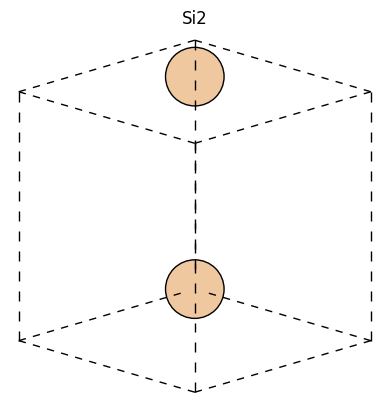

In [7]:
# draw silicon structure

import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

fig, ax = plt.subplots()
plot_atoms(atoms, ax, radii=0.3, rotation=('45x,45y,90z'))
ax.set_title(atoms.get_chemical_formula())
ax.set_axis_off()
plt.show()

# Calculate total energy

NOTE: Check that pseudopotential file is present in the directory 'silicon'.

In [9]:
!/content/q-e/bin/pw.x < si.scf.in > si.scf.out
! grep '!' si.scf.out